Based on a post @ [Towards Data Science](https://towardsdatascience.com/continuous-genetic-algorithm-from-scratch-with-python-ff29deedd099).

- Further reading:
    - [Holland, John H.](https://mitpress.mit.edu/books/adaptation-natural-and-artificial-systems);
    - [Haupt, Randy L., Haupt, Sue Ellen](https://www.wiley.com/en-us/Practical+Genetic+Algorithms%2C+2nd+Edition-p-9780471455653).

In [1]:
from IPython.display import Image

### Flowchart of Genetic Algorithms

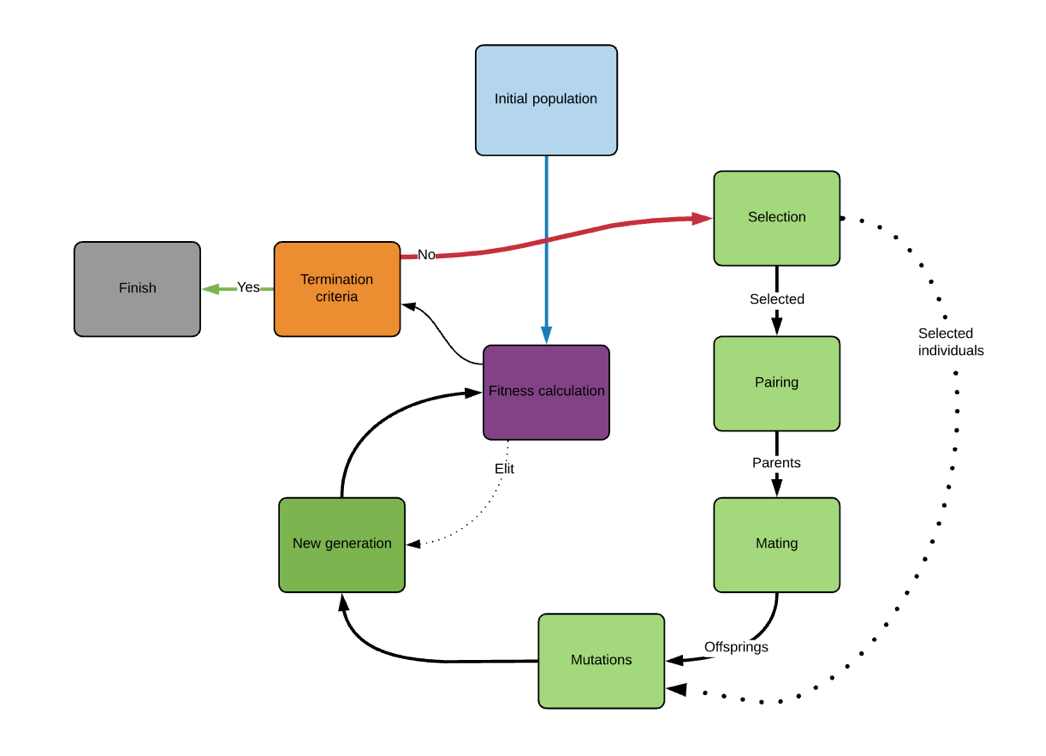

In [2]:
Image('./IMG/genalg-flowchart.png')

> "Genetic algorithms create an initial population of randomly generated candidate solutions, these candidate solutions are evaluated, and their fitness value is calculated. The fitness value of a solution is the numeric value that determines how good a solution is, higher the fitness value better the solution. The figure below shows an example generation with 8 individuals. Each individual is made up of 4 genes, which represent the optimization parameters, and each individual has a fitness value, which in this case is the sum of the values of the genes."

### An example of generation

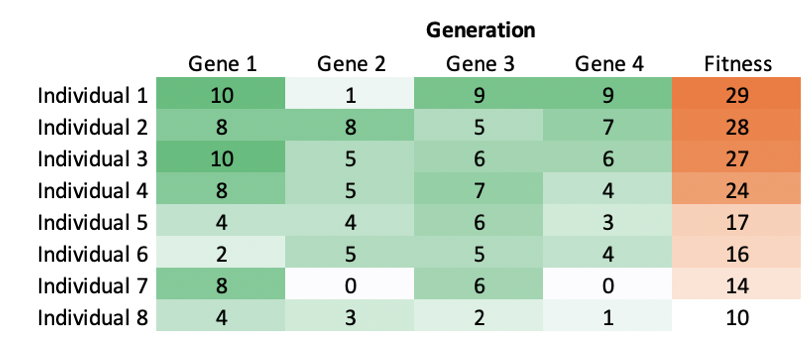

In [3]:
Image('./IMG/generation-example.png')

> "If the initial population does not meet the requirements of the termination criteria, genetic algorithm creates the next generation. The first genetic operation is Selection; in this operation, the individuals that are going to be moving on to the next generation are selected. After the selection process, Pairing operation commences. Pairing operation pairs the selected individuals two by two for the Mating operation. The Mating operation takes the paired parent individuals and creates offsprings, which will be replacing the individuals that were not selected in the Selection operation, so the next generation has the same number of individuals as the previous generation. This process is repeated until the termination criteria is met."

In [4]:
import numpy as np
from numpy.random import randint
from random import random as rnd
from random import gauss, randrange

### Initial population

In [5]:
def individual(number_of_genes, upper_limit, lower_limit):
    '''
    Creates an individual.
    '''
    individual=[round(rnd()*(upper_limit-lower_limit)
                +lower_limit,1) for x in range(number_of_genes)]
    return individual

In [6]:
def population(number_of_individuals,
               number_of_genes, upper_limit, lower_limit):
    '''
    Creates a whole population.
    '''
    return [individual(number_of_genes, upper_limit, lower_limit) 
        for x in range(number_of_individuals)]

### Fitness calculation

In [7]:
def fitness_calculation(individual):
    '''
    Calculates the fitness, which in this example
    equals the sum of the genes.
    '''
    fitness_value = sum(individual)
    return fitness_value

> "This is a very simple fitness function with only one parameter. Fitness function can be calculated for multiple parameters. For multiple parameters, normalizing the different parameters is vert (*sic*) important, the difference in magnitude between different parameters may cause one of the parameters to become obsolete for the fitness function value. Parameters can be optimized with different methods, one of the normalization methods is rescaling. Rescaling can be shown as:"

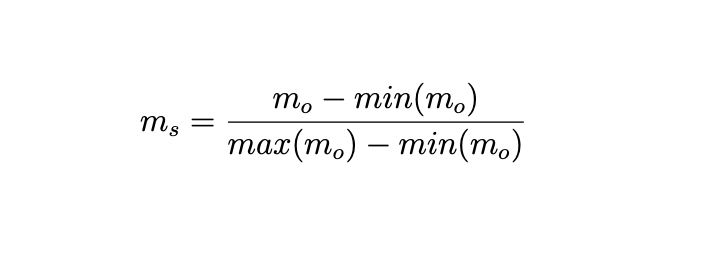

In [8]:
Image('./IMG/param-normalization.png')

> "where the $m_s$ is the scaled value of the parameter, $m_o$ is the actual value of the parameter."

> "After the parameters are normalized, the importance of the parameters are (*sic*) determined by the biases given to each parameter in the fitness function. Sum of the biases given to the parameters should be 1. For multiple parameters, the fitness function can be written as:"

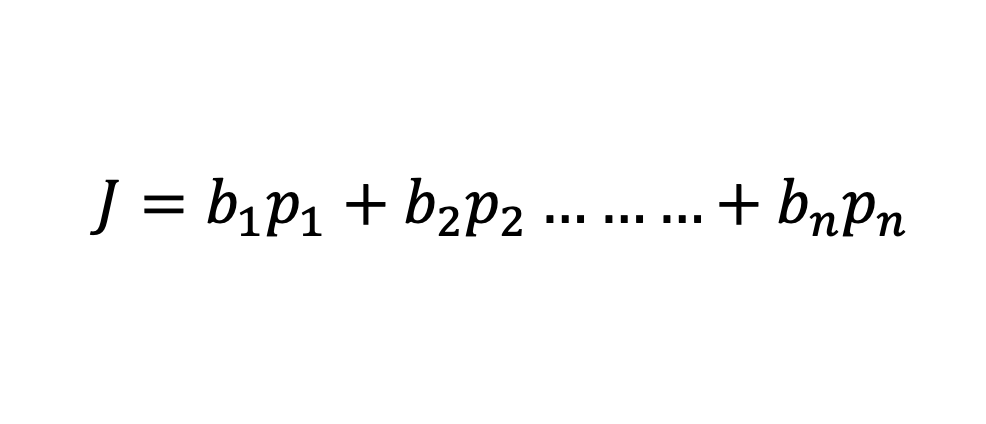

In [9]:
Image('./IMG/param-combination.png')

> "where $b_i$ represents the biases of the fitness function and $p_i$ represents the normalized parameters."

### Selection

> "The Selection function takes the population of candidate solutions and their fitness values (a generation) and outputs the individuals that are going to be moving on to the next generation. Elitism can be introduced to the genetic algorithm, which will automatically select the best individual in a generation, so we do not lose the best solution. There are a few selection methods that can be used."

##### Roulette wheel selection:

> "In roulette wheel selection, each individual has a chance to be selected. The chance of an individual to be selected is based on the fitness value of the individual. Fitter individuals have a higher chance to be selected."

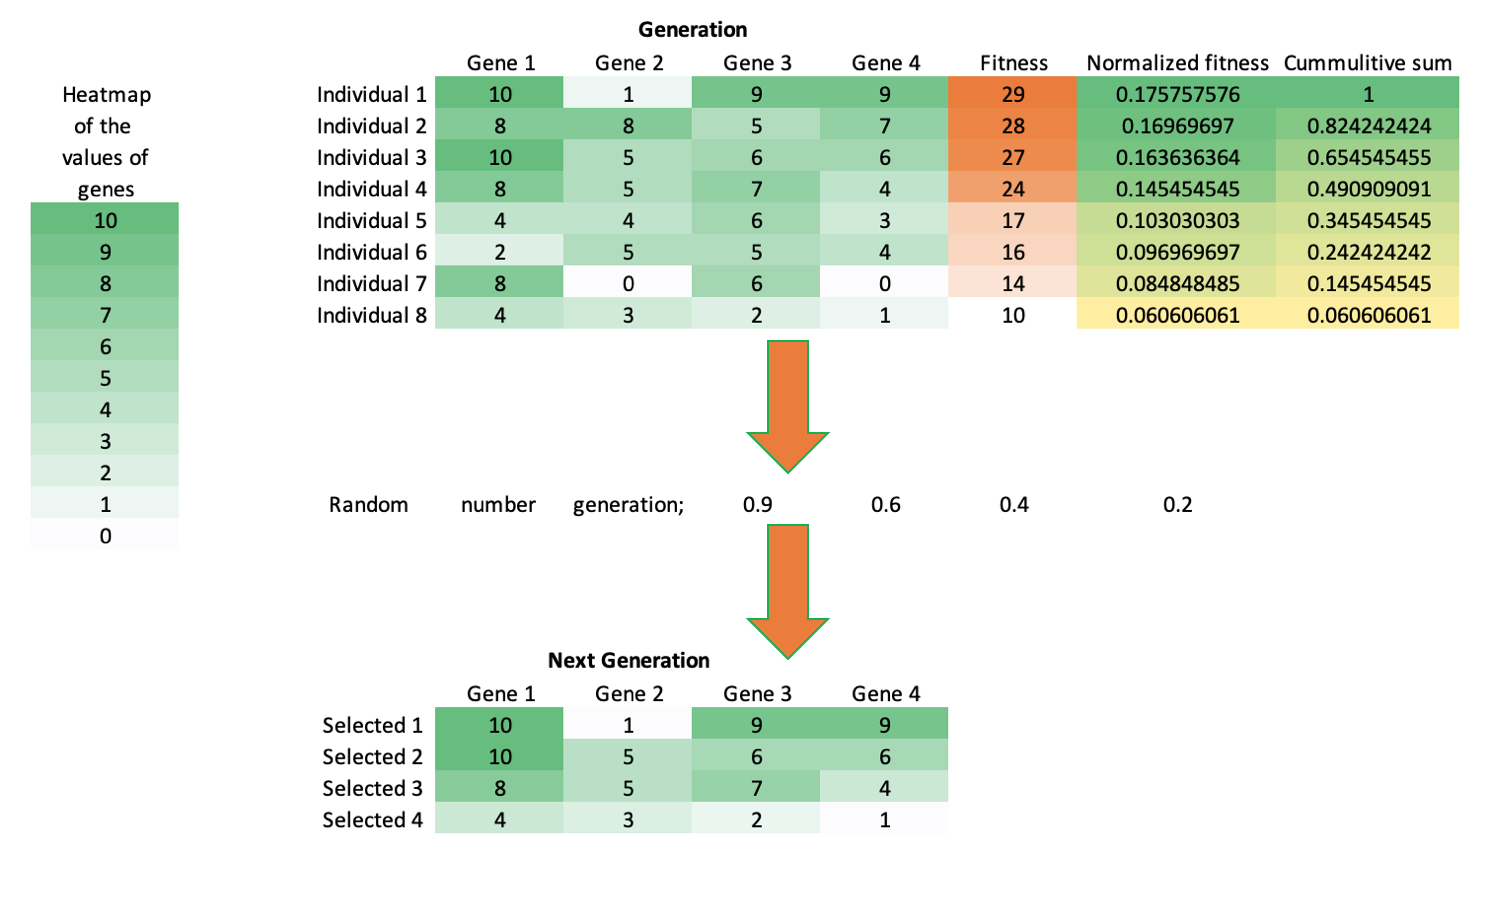

In [10]:
Image('./IMG/roulette-wheel-selection.png')

> "The function for roulette wheel selection takes the cumulative sums and the randomly generated value for the selection process and returns the number of the selected individual. By calculating the cumulative sums, each individual have a unique value between 0 and 1. To select individuals, a number between 0 and 1 is randomly generated and the individual that is closes to the randomly generated number is selected. The roulette function can be written as:"

In [11]:
def roulette(cum_sum, chance):
    veriable = list(cum_sum.copy())
    veriable.append(chance)
    veriable = sorted(veriable)
    return veriable.index(chance)

##### Fittest half selection

> "In this selection method, fittest half of the candidate solutions are selected to move to the next generation."

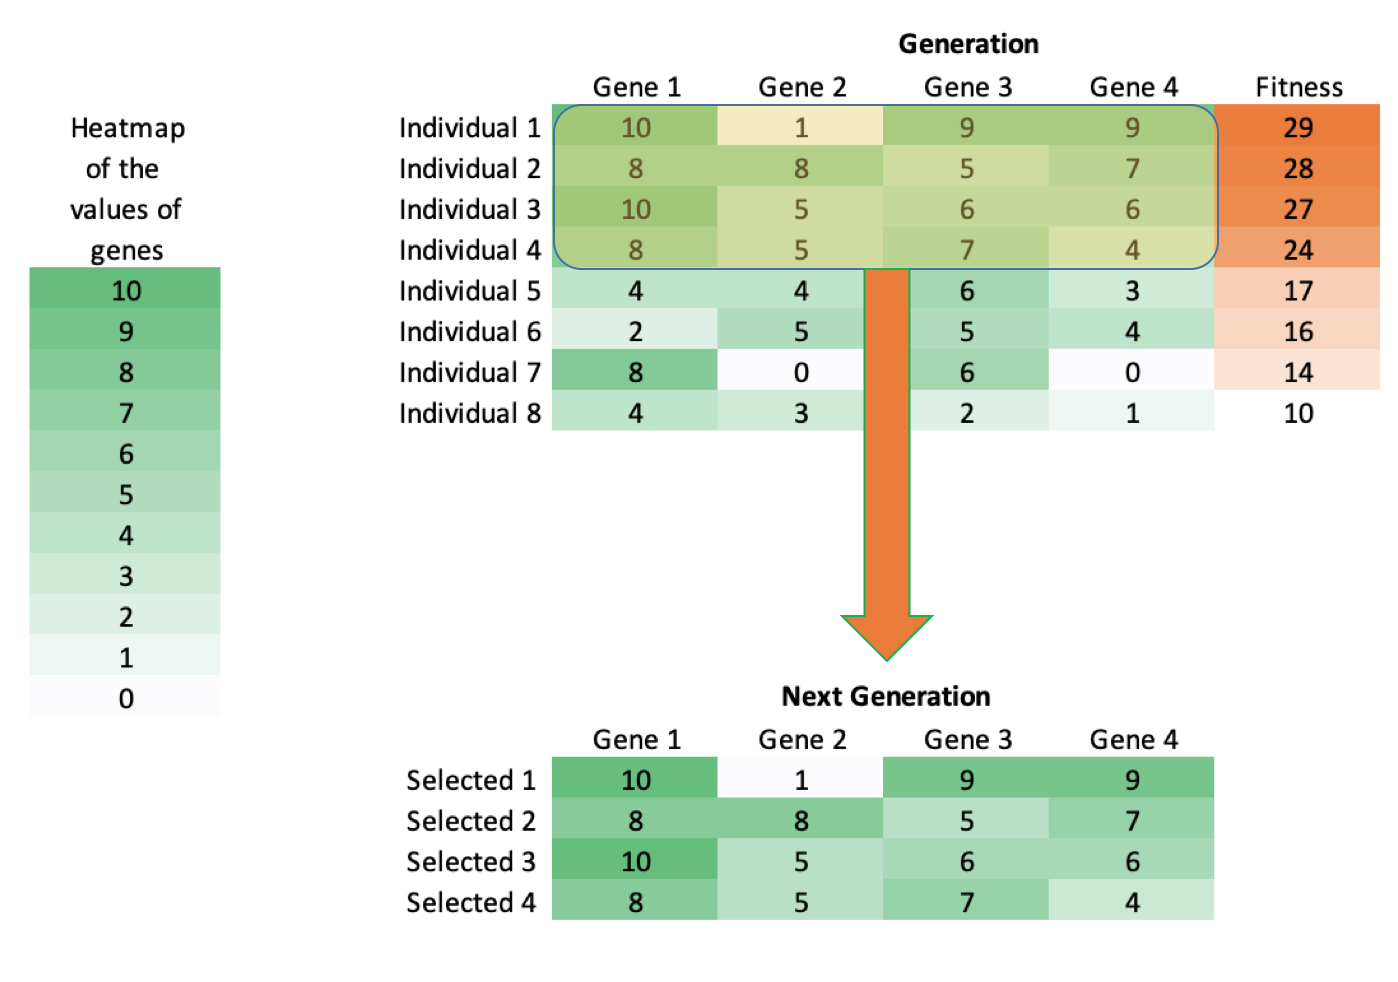

In [12]:
Image('./IMG/fittest-half-selection.png')

##### Random selection

> "In this method, individuals selected randomly."

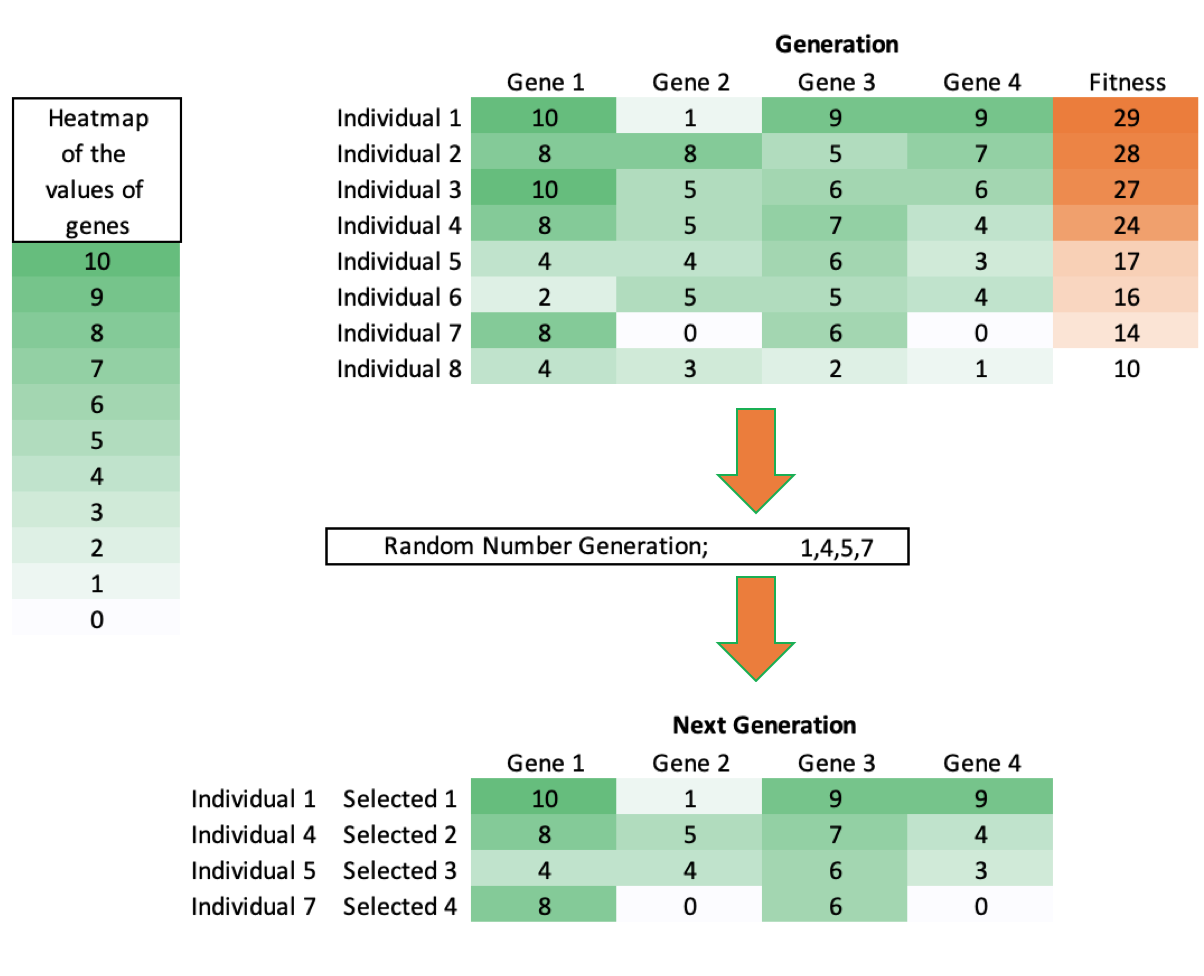

In [13]:
Image('./IMG/random-selection.png')

> "Selection function can be written as:"

In [14]:
def selection(generation, method='Fittest Half'):
    generation['Normalized Fitness'] = \
        sorted([generation['Fitness'][x]/sum(generation['Fitness'])
        for x in range(len(generation['Fitness']))], reverse = True)

    generation['Cumulative Sum'] = np.array(
        generation['Normalized Fitness']).cumsum()

    if method == 'Roulette Wheel':
        selected = []
        for x in range(len(generation['Individuals'])//2):
            selected.append(roulette(generation
                ['Cumulative Sum'], rnd()))
            while len(set(selected)) != len(selected):
                selected[x] = \
                    (roulette(generation['Cumulative Sum'], rnd()))
        selected = {'Individuals': 
            [generation['Individuals'][int(selected[x])]
                for x in range(len(generation['Individuals'])//2)]
                ,'Fitness': [generation['Fitness'][int(selected[x])]
                for x in range(
                    len(generation['Individuals'])//2)]}
    
    elif method == 'Fittest Half':
        selected_individuals = [generation['Individuals'][-x-1]
            for x in range(int(len(generation['Individuals'])//2))]
        selected_fitnesses = [generation['Fitness'][-x-1]
            for x in range(int(len(generation['Individuals'])//2))]
        selected = {'Individuals': selected_individuals,
                    'Fitness': selected_fitnesses}
    
    elif method == 'Random':
        selected_individuals = \
            [generation['Individuals']
                [randint(1,len(generation['Fitness']))]
            for x in range(int(len(generation['Individuals'])//2))]
        selected_fitnesses = [generation['Fitness'][-x-1]
            for x in range(int(len(generation['Individuals'])//2))]
        selected = {'Individuals': selected_individuals,
                    'Fitness': selected_fitnesses}

    return selected

### Pairing

> "Pairing and mating are used as a single operation in most genetic algorithm applications, but for creating simpler functions and to be able to used different mating and paring algorithms easily, the two genetic operations are separated in this application. If there is elitism in the genetic algorithm, the elit must be an input to the function as well as the selected individuals. We are going to discuss three different pairing methods."

##### Fittest

> "In this method, individuals are paired two by two, starting from the fittest individual. By doing so, fitter individuals are paired together, but less fit individuals are paired together as well."

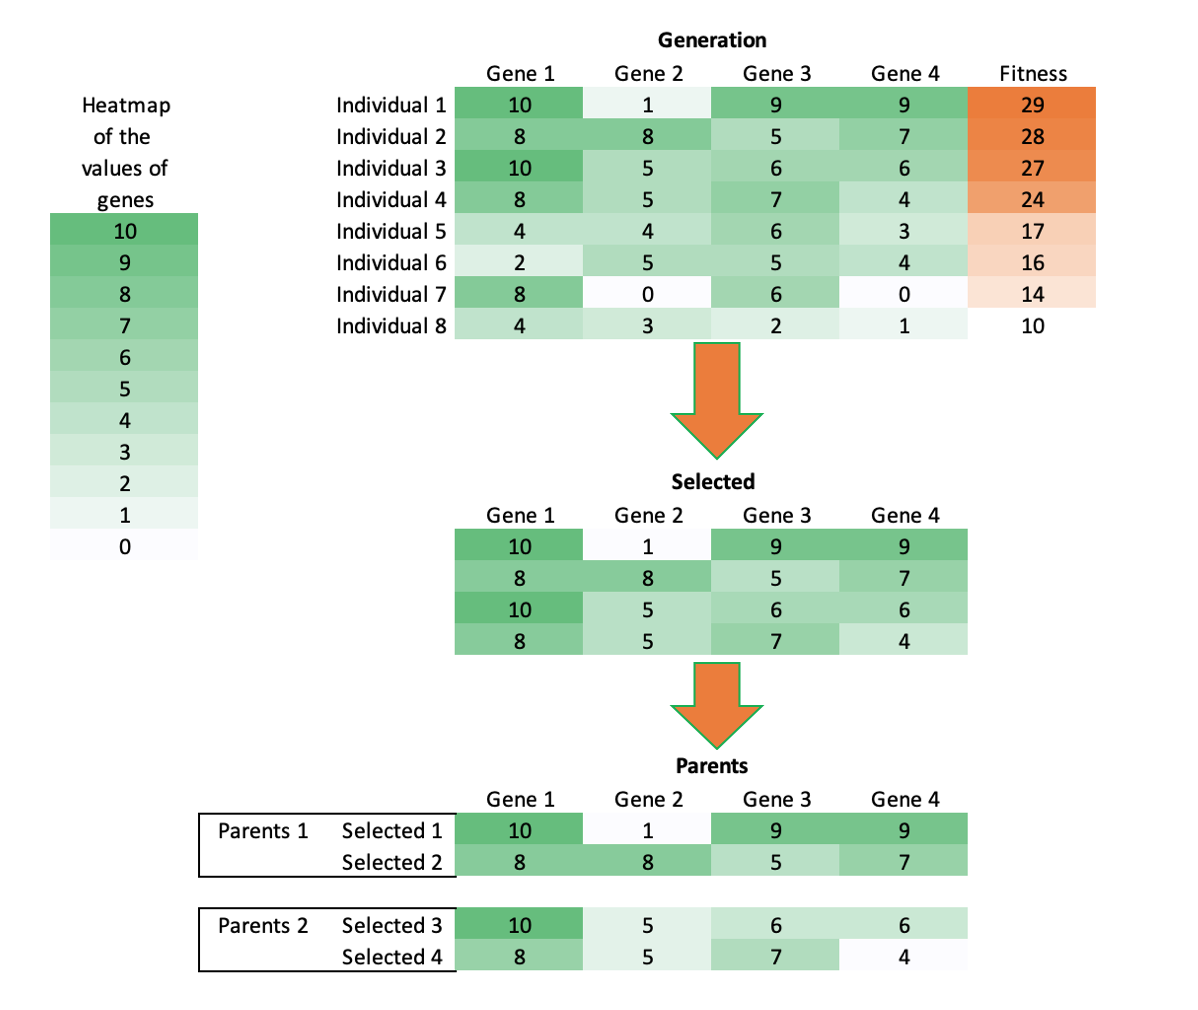

In [15]:
Image('./IMG/fittest-pairing.png')

##### Random

> "In this method, individuals are paired two by two randomly."

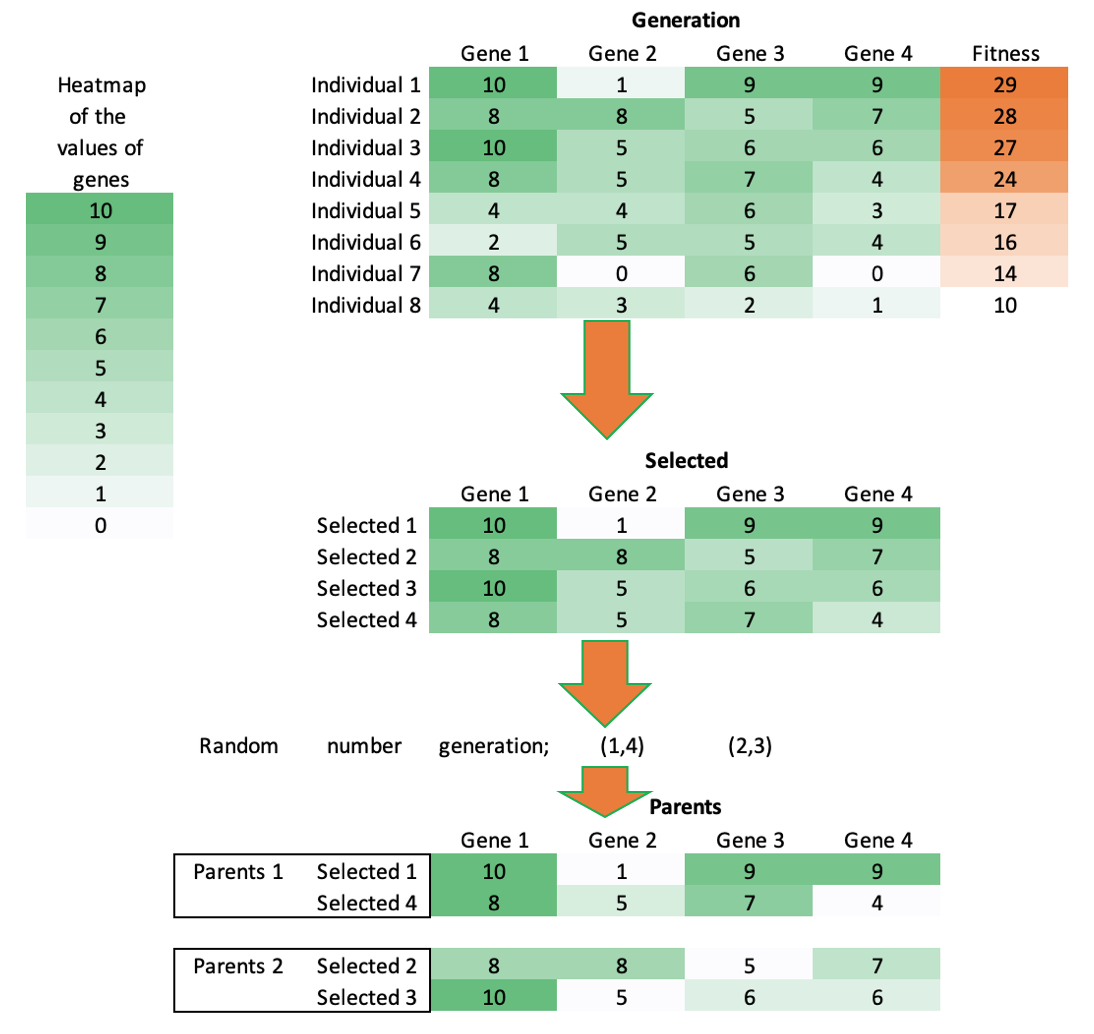

In [16]:
Image('./IMG/random-pairing.png')

##### Weighted random

> "In this method, individuals are paired randomly two by two, but fitter individuals have a higher chance to be selected for pairing."

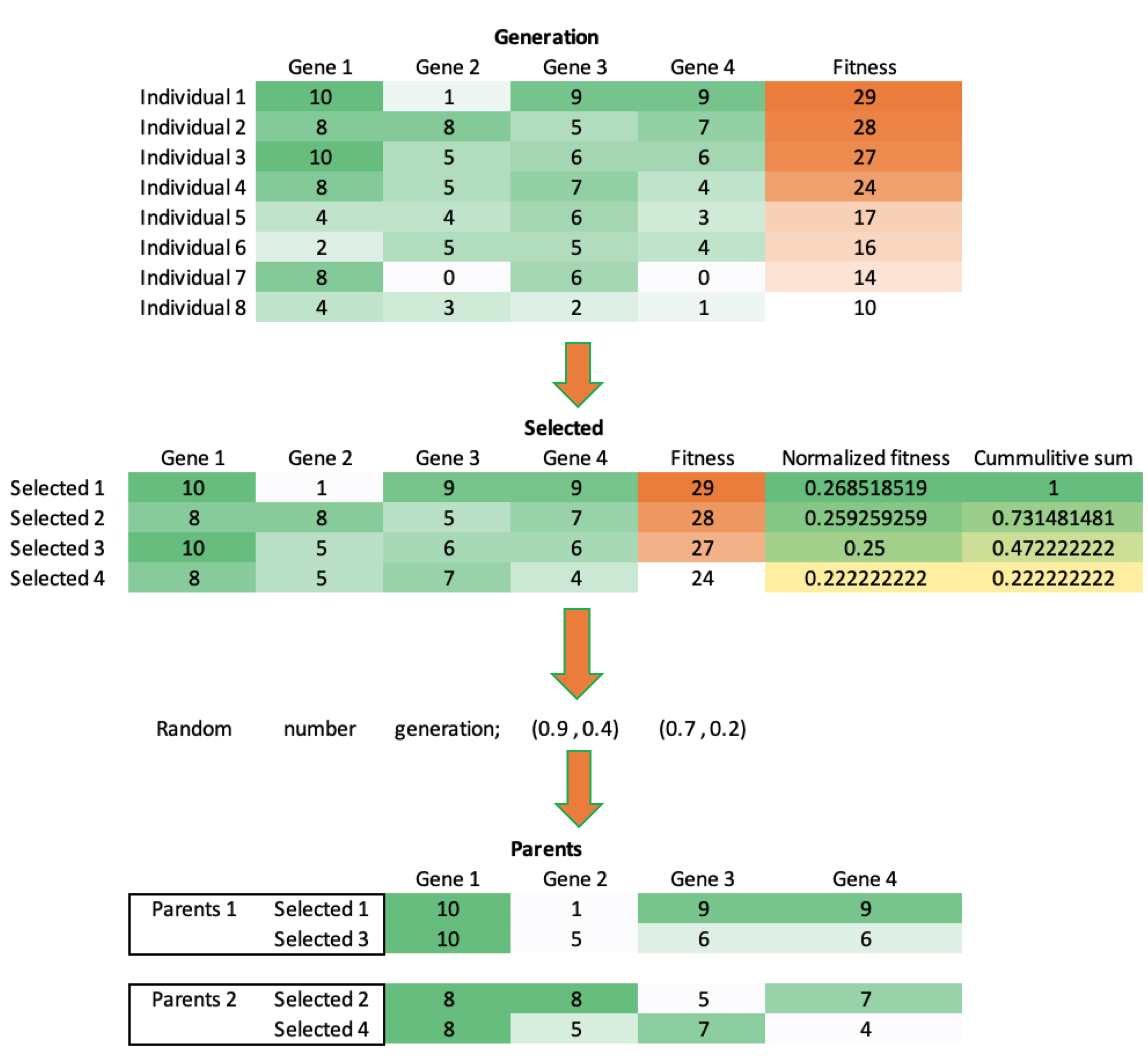

In [17]:
Image('./IMG/weighted-random-pairing.png')

> "Pairing function can be written as:"

In [18]:
def pairing(elit, selected, method = 'Fittest'):
    individuals = [elit['Individuals']]+selected['Individuals']
    fitness = [elit['Fitness']]+selected['Fitness']

    if method == 'Fittest':
        parents = [[individuals[x],individuals[x+1]] 
                   for x in range(len(individuals)//2)]

    if method == 'Random':
        parents = []
        for x in range(len(individuals)//2):
            parents.append(
                [individuals[randint(0,(len(individuals)-1))],
                 individuals[randint(0,(len(individuals)-1))]])
            while parents[x][0] == parents[x][1]:
                parents[x][1] = individuals[
                    randint(0,(len(individuals)-1))]

    if method == 'Weighted Random':
        normalized_fitness = sorted(
            [fitness[x] /sum(fitness) 
             for x in range(len(individuals)//2)], reverse = True)
        cummulitive_sum = np.array(normalized_fitness).cumsum()
        parents = []
        for x in range(len(individuals)//2):
            parents.append(
                [individuals[roulette(cummulitive_sum,rnd())],
                 individuals[roulette(cummulitive_sum,rnd())]])
            while parents[x][0] == parents[x][1]:
                parents[x][1] = individuals[
                    roulette(cummulitive_sum,rnd())]

    return parents

### Mating

> "We will discuss two different mating methods. In the Python code given below, two selected parent individuals create two offsprings. There are two mating methods we are going to discuss."

##### Single point

> "In this method, genes after a single point are replaced with the genes of the other parent to crate two offsprings."

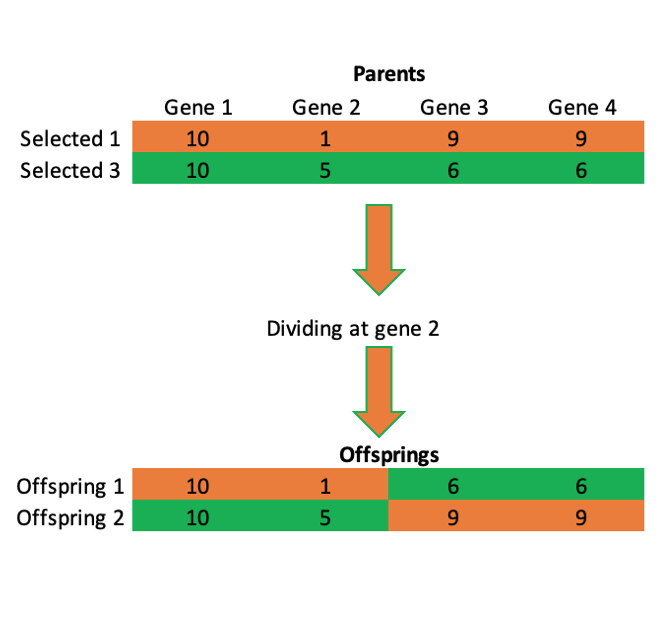

In [19]:
Image('./IMG/single-point-mating.png')

##### Two points

> "In this method, genes between two points are replaced with the genes of the other parent to create two offsprings."

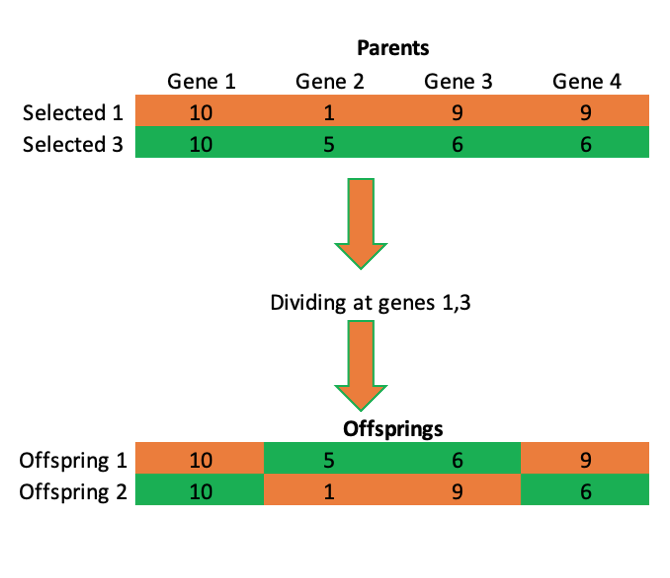

In [20]:
Image('./IMG/two-point-mating.png')

> "Mating function can be coded as:"

In [21]:
def mating(parents, method='Single Point'):
    if method == 'Single Point':
        pivot_point = randint(1, len(parents[0]))
        offsprings = [parents[0] \
            [0:pivot_point]+parents[1][pivot_point:]]
        offsprings.append(parents[1]
            [0:pivot_point]+parents[0][pivot_point:])

    if method == 'Two Pionts':
        pivot_point_1 = randint(1, len(parents[0]-1))
        pivot_point_2 = randint(1, len(parents[0]))
        while pivot_point_2<pivot_point_1:
            pivot_point_2 = randint(1, len(parents[0]))
        offsprings = [parents[0][0:pivot_point_1]+
            parents[1][pivot_point_1:pivot_point_2]+
            [parents[0][pivot_point_2:]]]
        offsprings.append([parents[1][0:pivot_point_1]+
            parents[0][pivot_point_1:pivot_point_2]+
            [parents[1][pivot_point_2:]]])

    return offsprings

### Mutations

> "The final genetic operation is random mutations. Random mutations occur in the selected individuals and their offsprings to improve variety of the next generation. If there is elitism in the genetic algorithm, elit individual does not go through random mutations so we do not lose the best solution. We are going to discuss two different mutation methods."

##### Gauss

> "In this method, the gene that goes through mutation is replaced with a number that is generated according to gauss distribution around the original gene."

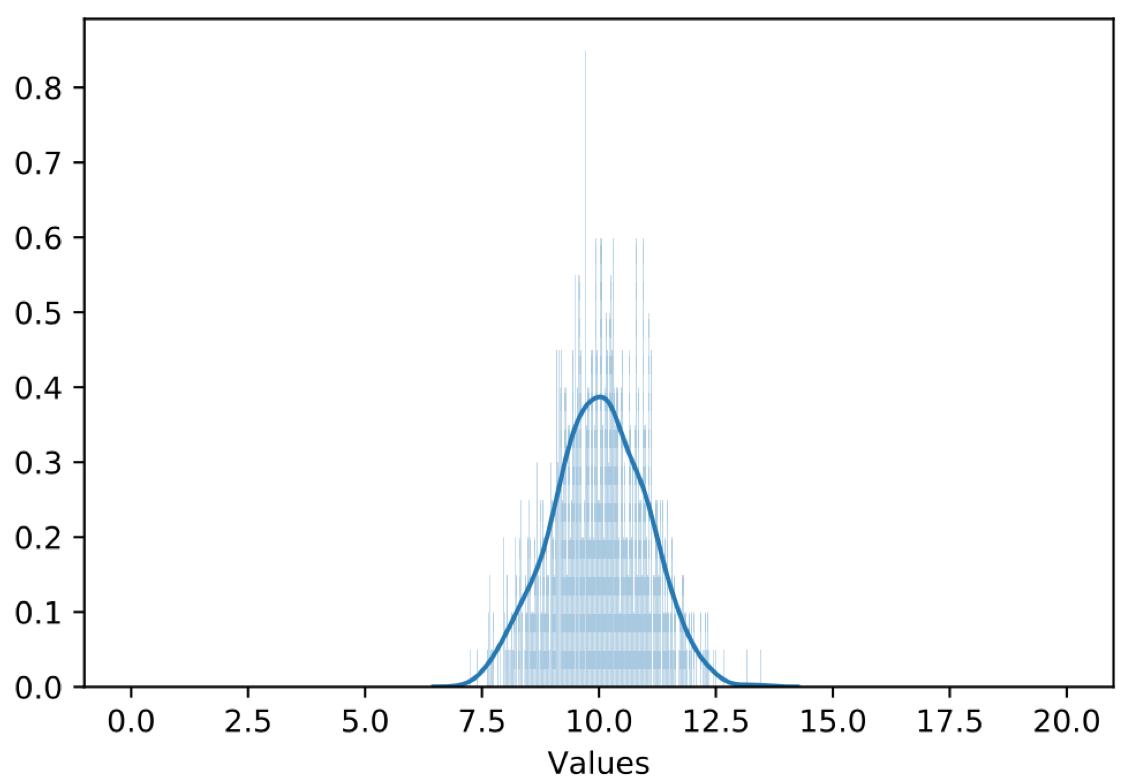

In [22]:
Image('./IMG/gauss-mutation.png')

##### Reset

> "In this method, the original gene is replaced with a randomly generated gene."

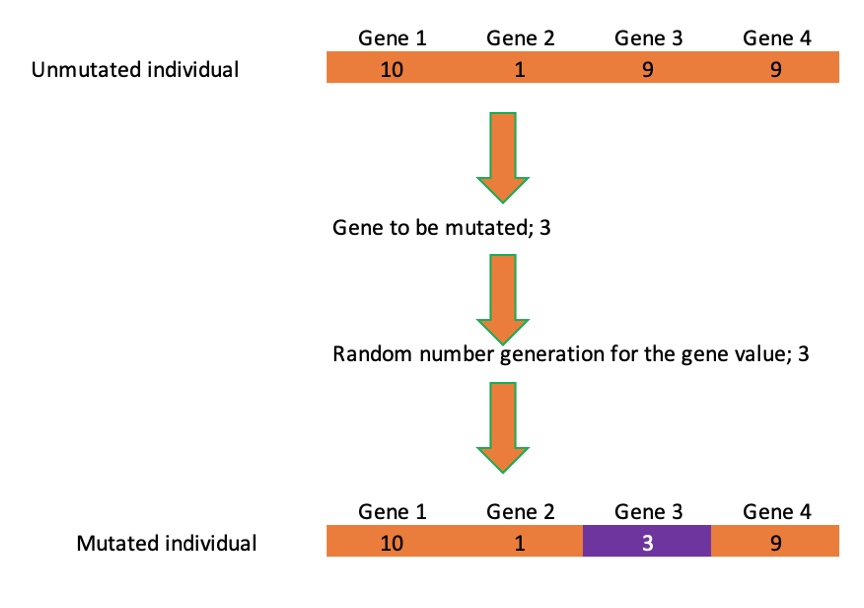

In [23]:
Image('./IMG/reset-mutation.png')

> "The mutation function can be written as:"

In [24]:
def mutation(individual, upper_limit, lower_limit, mutation_rate=2, 
    method='Reset', standard_deviation = 0.001):
    gene = [randint(0, 7)]

    for x in range(mutation_rate-1):
        gene.append(randint(0, 7))
        while len(set(gene)) < len(gene):
            gene[x] = randint(0, 7)
    mutated_individual = individual.copy()

    if method == 'Gauss':
        for x in range(mutation_rate):
            mutated_individual[x] = \
            round(individual[x]+gauss(0, standard_deviation), 1)

    if method == 'Reset':
        for x in range(mutation_rate):
            mutated_individual[x] = round(rnd()* \
                (upper_limit-lower_limit)+lower_limit,1)

    return mutated_individual

### Creating The Next Generation

> "The next generation is created using the genetic operations we discussed. Elitism can be introduced to the genetic algorithm during the creating of next generation."


In [25]:
def next_generation(gen, upper_limit, lower_limit):
    elit = {}
    next_gen = {}
    elit['Individuals'] = gen['Individuals'].pop(-1)
    elit['Fitness'] = gen['Fitness'].pop(-1)
    selected = selection(gen)
    parents = pairing(elit, selected)
    offsprings = [[[mating(parents[x])
                    for x in range(len(parents))]
                    [y][z] for z in range(2)] 
                    for y in range(len(parents))]

    offsprings1 = [offsprings[x][0]
                   for x in range(len(parents))]
    offsprings2 = [offsprings[x][1]
                   for x in range(len(parents))]
    unmutated = selected['Individuals']+offsprings1+offsprings2
    mutated = [mutation(unmutated[x], upper_limit, lower_limit) 
        for x in range(len(gen['Individuals']))]
    unsorted_individuals = mutated + [elit['Individuals']]
    unsorted_next_gen = \
        [fitness_calculation(mutated[x]) 
         for x in range(len(mutated))]
    unsorted_fitness = [unsorted_next_gen[x]
        for x in range(len(gen['Fitness']))] + [elit['Fitness']]
    sorted_next_gen = \
        sorted([[unsorted_individuals[x], unsorted_fitness[x]]
            for x in range(len(unsorted_individuals))], 
                key=lambda x: x[1])
    next_gen['Individuals'] = [sorted_next_gen[x][0]
        for x in range(len(sorted_next_gen))]
    next_gen['Fitness'] = [sorted_next_gen[x][1]
        for x in range(len(sorted_next_gen))]
    gen['Individuals'].append(elit['Individuals'])
    gen['Fitness'].append(elit['Fitness'])

    return next_gen

### Termination Criteria

> "After a generation is created, termination criteria are used to determine if the genetic algorithm should create another generation or should it stop. Different termination criteria can be used at the same time and if the genetic algorithm satisfies one of the criteria the genetic algorithm stops."

##### Maximum fitness

> "This termination criteria checks if the fittest individual in the current generation satisfies our criteria. Using this termiantion method, desired results can be obtained. As seen from the figure below, maximum fitness limit can be determined to include some of the local minima."


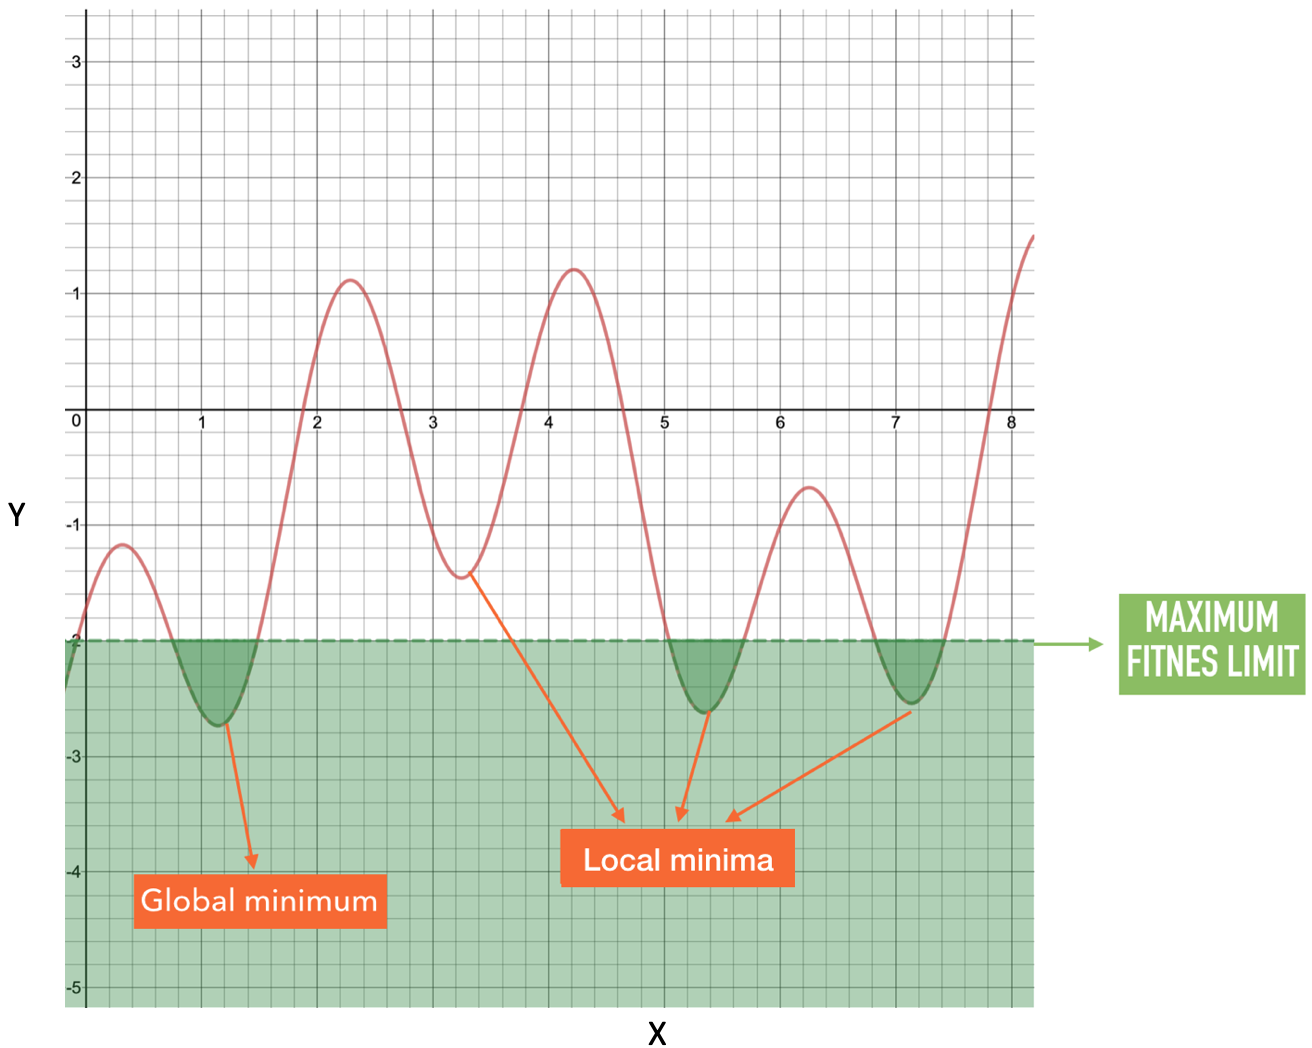

In [26]:
Image('./IMG/max-fitness-criterium.png')

##### Maximum average fitness

> "If we are interested in a set of solutions average values of the individuals in the current generations can be checked to determine if the current generation satisfies our expectations."

##### Maximum number of generations

> "We could limit the maximum number of generations created by the genetic algorithm."

##### Maximum similar fitness number

> "Due to elitism best individual in a generation moves on to the next generation without mutating. This individual can be the best individual in the next generation as well. We can limit the number for the same individual to be the best individual as this can be sing that the genetic algorithm got stuck in a local minima. The function for checking if the maximum fitness value have changed can be written as:"


In [27]:
def fitness_similarity_check(max_fitness, number_of_similarity):
    result = False
    similarity = 0

    for n in range(len(max_fitness)-1):
        if max_fitness[n] == max_fitness[n+1]:
            similarity += 1
        else:
            similarity = 0

    if similarity == number_of_similarity-1:
        result = True

    return result

### Running the Algorithm

> "To run the genetic algorithm with 20 individuals in each generation:"

In [28]:
# Generations and fitness values will be written to this file
Result_file = 'GA_Results.txt'

# Creating the First Generation
def first_generation(pop):
    fitness = [fitness_calculation(pop[x]) 
        for x in range(len(pop))]
    sorted_fitness = sorted([[pop[x], fitness[x]]
        for x in range(len(pop))], key=lambda x: x[1])
    population = [sorted_fitness[x][0] 
        for x in range(len(sorted_fitness))]
    fitness = [sorted_fitness[x][1] 
        for x in range(len(sorted_fitness))]
    return {'Individuals': population, 'Fitness': sorted(fitness)}

pop = population(20,8,1,0)
gen = []
gen.append(first_generation(pop))
fitness_avg = np.array([sum(gen[0]['Fitness'])/
                        len(gen[0]['Fitness'])])
fitness_max = np.array([max(gen[0]['Fitness'])])
res = open(Result_file, 'a')
res.write('\n'+str(gen)+'\n')
res.close()
finish = False

while finish == False:
    if max(fitness_max) > 6:
        break
    if max(fitness_avg) > 5:
        break
    if fitness_similarity_check(fitness_max, 50) == True:
        break
    gen.append(next_generation(gen[-1],1,0))
    fitness_avg = np.append(fitness_avg, sum(
        gen[-1]['Fitness'])/len(gen[-1]['Fitness']))
    fitness_max = np.append(fitness_max, max(gen[-1]['Fitness']))
    res = open(Result_file, 'a')
    res.write('\n'+str(gen[-1])+'\n')
    res.close()
